In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
import numpy as np
import handcalcs.render

In [2]:
data = pd.DataFrame({'Drug Dosage': [4,6,11,20],
                    'Drug Effectiveness':[0,1,1,0]})

data['Drug Effectiveness (new)'] = data['Drug Effectiveness'] - 0.5
data

,Drug Dosage,Drug Effectiveness,Drug Effectiveness (new)
0,4,0,-0.5
1,6,1,0.5
2,11,1,0.5
3,20,0,-0.5


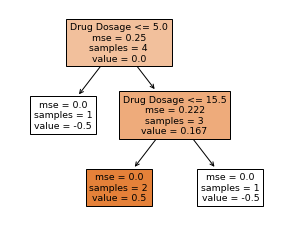

In [3]:
X,y = data[['Drug Dosage']], data['Drug Effectiveness (new)'] 
tree1 = DecisionTreeRegressor(max_depth=2)
tree1 = tree1.fit(X, y)

fig = plt.figure(figsize=(5,4))
_ = tree.plot_tree(tree1, feature_names = X.columns, filled = True)

In [4]:
row1, row2, row3, row4 = np.split(data['Drug Effectiveness (new)'].values,4)

Lambda = 0
PreviousProbability = (np.ones(4)-0.5)*0.5

In [5]:
%%render
residual = sum((row1, row2, row3, row4))**2 # total residaul 
similar = residual/(sum(PreviousProbability) + Lambda) # similarity score

<IPython.core.display.Latex object>

In [6]:
row1, row2 = np.split(data['Drug Effectiveness (new)'].values,[1])
PreviousProbability = (np.ones(1)-0.5)*0.5
row1,row2

(array([-0.5]), array([ 0.5,  0.5, -0.5]))

In [7]:
%%render
residual = sum((row1))**2 # total residaul 
similar1 = residual/(sum(PreviousProbability) + Lambda) # similarity score

<IPython.core.display.Latex object>

In [8]:
PreviousProbability = (np.ones(3)-0.5)*0.5

In [9]:
%%render
residual = sum((row2))**2 # total residaul 
similar2 = residual/(sum(PreviousProbability) + Lambda) # similarity score

<IPython.core.display.Latex object>

In [10]:
%%render
gain = similar1 + similar2 -similar

<IPython.core.display.Latex object>

In [11]:
row1, row2 = np.split(data['Drug Effectiveness (new)'][1:].values,[2])
PreviousProbability = (np.ones(2)-0.5)*0.5

In [12]:
%%render
residual = sum((row1))**2 # total residaul 
similar3 = residual/(sum(PreviousProbability) + Lambda) # similarity score

<IPython.core.display.Latex object>

In [13]:
PreviousProbability = (np.ones(1)-0.5)*0.5

In [14]:
%%render
residual = sum((row2))**2 # total residaul 
similar4 = residual/(sum(PreviousProbability) + Lambda) # similarity score

<IPython.core.display.Latex object>

In [15]:
%%render
gain2 = similar3 + similar4 -similar2

<IPython.core.display.Latex object>

### Cover is defined as the denominator of the similarity score minus lambda
**it is sum of previous probability * (1- previous probability)**

**set min_child_weight as 0**

**set Gamma as 2**

In [16]:
gamma = 2

# we will not remove the first branch, 
# then we compare the root
# since we did not remove the first branch
# we will not remove the root
# then we will not remove the root. 
print(gamma > gain2,  gamma > gain)

gamma = 3
# we  remove the first branch, 
# then we compare the root,
# both branch and root are smaller than gain
# we will not remove the root and branch
print(gamma > gain2, gamma > gain)

False [ True]
True [ True]


#### Set the lambda to a positive number
#### the similartiy score shrinks

In [38]:
learning_rate = 0.3 

output = np.exp(np.log(0.5/(1-0.5)) + 0.3 * -0.5/(0.5**2))
output2 = np.exp(np.log(0.5/(1-0.5)) + 0.3 * (0.5+0.5)/(0.5**2*2))
output3 = np.exp(np.log(0.5/(1-0.5)) +0.3* -0.5/(0.5**2))

print(output/(1+output), output2/(1+output2), output3/(1+output3))

0.35434369377420455 0.6456563062257954 0.35434369377420455


In [40]:
data['Probability'] = [output/(1+output), output2/(1+output2),output2/(1+output2), output3/(1+output3)]
data['New Residual'] = data['Drug Effectiveness'] - data['Probability']
data

,Drug Dosage,Drug Effectiveness,Drug Effectiveness (new),Probability,New Residual
0,4,0,-0.5,0.354344,-0.354344
1,6,1,0.5,0.645656,0.354344
2,11,1,0.5,0.645656,0.354344
3,20,0,-0.5,0.354344,-0.354344


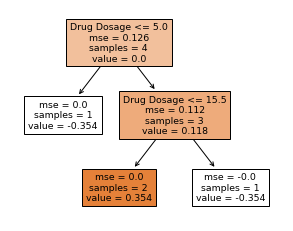

In [41]:
X,y = data[['Drug Dosage']], data['New Residual'] 
tree1 = DecisionTreeRegressor(max_depth=2)
tree1 = tree1.fit(X, y)

fig = plt.figure(figsize=(5,4))
_ = tree.plot_tree(tree1, feature_names = X.columns, filled = True)

In [42]:
row1, row2, row3, row4 = np.split(data['New Residual'].values,4)

Lambda = 0
PreviousProbability = (np.ones(4)-data['New Residual'].values)*data['New Residual'].values


array([-0.47990315,  0.22878424,  0.22878424, -0.47990315])

In [43]:
%%render
residual = sum((row1, row2, row3, row4))**2 # total residaul 
similar = residual/(sum(PreviousProbability) + Lambda) # similarity score

<IPython.core.display.Latex object>

In [ ]:
# using the new prediction, the residual is smaller than before,
# we take another step toward right direction, 
# We build another tree based on the residual, and predict those residual on the second tree
# we repeat the process until we reach the maximum numbers of trees or residual is small enough